In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def binspec_left(wvl, flux, uncer, bin_factor):
    
    """
    Parameters
    ----------
    wvl : np.ndarray
        Original logspaced bin edges.
    flux : np.ndarray
        Old fluxes.
    uncer : np.ndarray
        Old uncertainties.
    bin_factor : float
        Factor to reduce original resolution by.
        
    Returns
    -------
    new_wvl : np.ndarray
        New logspaced bin edges.
    new_flux : np.ndarray
        New fluxes.
    new_uncer : np.ndarray
        New uncertainties.
    """
    
    wvllog = np.log(wvl)
    number_of_newbins = float(len(wvllog)) / bin_factor
    if float(number_of_newbins).is_integer():
        N = bin_factor - 0.000000000000001
    else:
        N = bin_factor
    integer_bin_factor = int(N)    
    integer_bin_factor_2 = int(N)
    remaining_bin_fraction = N - integer_bin_factor
    remaining_bin_fraction_2 = N - integer_bin_factor
    i = 0
    k = 0
    old_bin_length = wvllog[i + 1] - wvllog[i]
    old_bin_radius = float(old_bin_length) / 2.0
    new_bin_length = old_bin_length * N
    new_bin_radius = float(new_bin_length) / 2.0
    bin_radius_diff = new_bin_radius - old_bin_radius
    new_wvl = []
    new_flux = []
    new_uncer = []
    new_bin_center = wvllog[i] + bin_radius_diff
    new_wvl.append(np.exp(new_bin_center))
    new_flux.append(flux[i:i + integer_bin_factor].sum() + remaining_bin_fraction * flux[i + integer_bin_factor])
    new_uncer.append(np.sqrt(np.sum(np.square(uncer[i:i + integer_bin_factor])) + np.square(remaining_bin_fraction * uncer[i + integer_bin_factor])))
    while i + integer_bin_factor + (int(N - 1 + remaining_bin_fraction) + 1) <= len(wvllog) - 1:
        i = i + integer_bin_factor
        k = k + integer_bin_factor_2
        integer_bin_factor = int(N - (1 - remaining_bin_fraction)) + 1
        integer_bin_factor_2 = int(N - (1 - remaining_bin_fraction_2)) + 1
        remaining_bin_fraction_2 = N - (integer_bin_factor - remaining_bin_fraction_2)
        new_bin_center +=  (1 - remaining_bin_fraction) * (wvllog[i+1] - wvllog[i])  + wvllog[i + integer_bin_factor] - wvllog[i + 1] + remaining_bin_fraction_2 * (wvllog[i + integer_bin_factor] - wvllog[i + integer_bin_factor - 1])
        new_wvl.append(np.exp(new_bin_center))
        new_flux.append((1 - remaining_bin_fraction) * flux[i] + flux[i + 1:i + integer_bin_factor].sum() + remaining_bin_fraction_2 * flux[i + integer_bin_factor])
        new_uncer.append(np.sqrt(np.square((1 - remaining_bin_fraction) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + integer_bin_factor])) + np.square(remaining_bin_fraction_2 * uncer[i + integer_bin_factor])))
        remaining_bin_fraction = N - (integer_bin_factor - remaining_bin_fraction)
    return np.array(new_wvl), np.array(new_flux), np.array(new_uncer)

In [6]:
def binspec_right(wvl, flux, uncer, bin_factor):
    wvl_log = np.log(wvl)
    number_of_newbins = float(len(wvl_log)) / bin_factor
    if float(number_of_newbins).is_integer():
        N = bin_factor - 0.000000000000001
    else:
        N = bin_factor
    N1 = int(N)
    N3 = int(N)
    #n = N - N1
    #n0 = N - N1
    #######################################################################################################
    integer_number_of_new_bins = int(len(wvl_log) / N)                                                        #                      #
    used_bins = integer_number_of_new_bins * N                                                            #                        #
    unpaired_bins = len(wvl_log) - used_bins                                                                  #
    N1_skip = int(unpaired_bins)                                                                          #
    remove_bin_fraction = unpaired_bins - int(unpaired_bins)                                              #          #
    n_new = 1 - remove_bin_fraction                                                                       #
    n_new_rem = N - n_new                                                                                 #
    n_new_2 = n_new_rem - int(n_new_rem - 0.00000000000001)                                               #                   #
    n_new_0 = n_new_rem - int(n_new_rem - 0.00000000000001)                                               #                   #
    N1_new = int(np.ceil(n_new_rem - 0.00000000000001))                                                   #                                                                    #
    #######################################################################################################
    i = N1_skip
    k = N1_skip
    old_bin_length = (wvl_log[i + 1] - wvl_log[i])              
    old_bin_radius = float(old_bin_length) / 2.0                 
    new_bin_length = old_bin_length * N                          
    new_bin_radius = float(new_bin_length) / 2.0                 
    bin_radius_diff = new_bin_radius - old_bin_radius
    new_wvl = []
    new_flux = []
    new_uncer = []
    new_bin_center = wvl_log[i] + bin_radius_diff + remove_bin_fraction
    new_wvl.append(np.exp(new_bin_center))
    #print("unpb:", unpairedbins, "remove_bins:", remove_bins, "N1_skip:", N1_skip, "n_new:", n_new, "n_new_2:", n_new_2,               #
     #     "SUM:", n_new+n_new_2, "i:", i, "N1_new:", N1_new, "i + N1_new:", i+N1_new, "BINS:" "brdiff:", brdiff, "wvl[-1]:", wvl[-1], "LAST BIN:", wvl[-1] - brdiff)     
    new_flux.append(n_new * flux[i] + flux[i + 1:i + N1_new].sum() + n_new_2 * flux[i + N1_new]) 
    new_uncer.append(np.sqrt(np.square(n_new * uncer[i]) + np.sum(np.square(uncer[i + 1:i + N1_new])) + np.square(n_new_2 * uncer[i + N1_new])))
    i = i + N1_new - N1
    while i + N1 + (int(N - 1.0000000000001 + n_new_2) + 1) <= len(wvl_log) - 1:
        #print(i + N1 + (int(N - 1.0000000000001 + n_new_2) + 1), "i:", i, "N3:", N3, "N1:", N1, 
        #      "n_new_0:", n_new_0, "n_new_2:", n_new_2, "i + N1:", i+N1, "n_test:", n_test, "N1_new:", N1_new)
        #print("OLD =>" "n_new_2:", n_new_2, "n_new_0:", n_new_0, "i:", i, "i + N1:", i + N1 + (int(N - 1 + n_new_2) + 1))
        i = i + N1
        k = k + N3
        N1 = int(N - 1.0000000000001 + n_new_2) + 1
        N3 = int(N - 1.0000000000001 - n_new_0) + 1
        n_new_0 = N - N1 + n_new_0
        #print("n_new_2:",1 - n_new_2, "N_NEW_0:", n_new_0, "i:", i, "i + N1:", i + N1, "N1:", N1)
        new_bin_center +=  (1 - n_new_2) * (wvl_log[i+1] - wvl_log[i])  + wvl_log[i + N1] - wvl_log[i + 1] + n_new_0 * (wvl_log[i + N1] - wvl_log[i + N1 - 1])
        new_wvl.append(np.exp(new_bin_center))
        new_flux.append((1 - n_new_2) * flux[i] + flux[i + 1:i + N1].sum() + n_new_0 * flux[i + N1])
        new_uncer.append(np.sqrt(np.square((1 - n_new_2) * uncer[i]) + np.sum(np.square(uncer[i + 1:i + N1])) + np.square(n_new_0 * uncer[i + N1])))
        n_new_2 = N - N1 + n_new_2
        #print("SHAPE:", "SHOULD:", int(len(wvl)/N))
    return np.array(new_wvl), np.array(new_flux), np.array(new_uncer)

# Sample spectrum with a drop at the start

## Resolution reduced by fartor 3.0

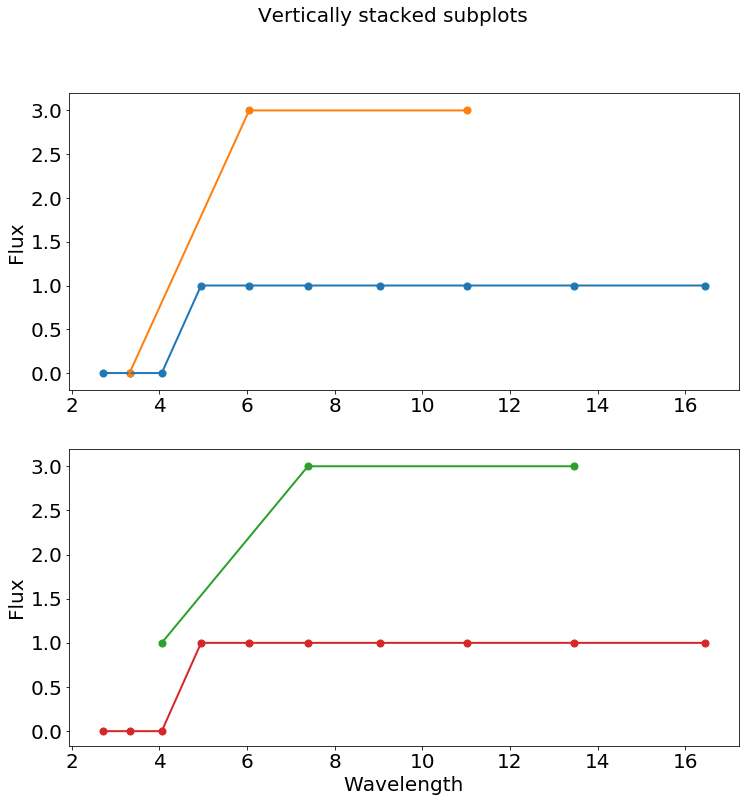

In [56]:
wvl = np.exp(np.arange(1., 3., 0.2))
flux = np.ones(len(wvl))
flux[0:3] = 0
ns_left = binspec_left(wvl, flux, flux, 3.0)
ns_right = binspec_right(wvl, flux, flux, 3.0)
#print("No. of new bins should be:", int(float(len(wvl)) / 3.0),  ";  No. of new bins are:", len(ns_right[0]))
fig, axs = plt.subplots(2, figsize=(12,12))
fig.suptitle('Vertically stacked subplots', fontsize=20)
axs[0].plot(wvl, flux, linewidth=2)
axs[0].scatter(wvl, flux,  s=50)
axs[0].plot(ns_left[0], ns_left[1], linewidth=2)
axs[0].scatter(ns_left[0], ns_left[1],  s=50)
axs[1].plot(wvl, flux, 'tab:red', linewidth=2)
axs[1].scatter(wvl, flux, s=50, c='tab:red')
axs[1].plot(ns_right[0], ns_right[1], 'tab:green', linewidth=2)
axs[1].scatter(ns_right[0], ns_right[1],  s=50, c='tab:green')
axs[1].set_xlabel('Wavelength', fontsize=20)
axs[0].set_ylabel('Flux', fontsize='20')
axs[1].set_ylabel('Flux', fontsize='20')
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
fig.savefig('plot.pdf')


#plt.plot(wvl_start, f_start, label="Original resolution")
#plt.scatter(wvl_start, f_start, label="Original resolution")
#plt.plot(ns_start[0], ns_start[1], label="1/3.0 resolution")
#plt.scatter(ns_start[0], ns_start[1], label="1/3.0 resolution")
#plt.xlabel('Wavelength', fontsize=14)
#plt.ylabel('Flux', fontsize=14)
#plt.legend

# Sample spectrum with a drop in the middle

## Resolution reduced by fartor 5.0

No. of new bins should be: 2 ;  No. of new bins are: (2,)


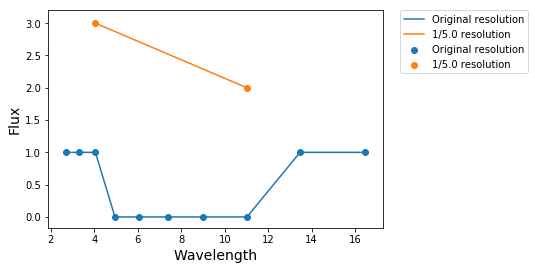

In [23]:
wvl_mid = np.exp(np.arange(1., 3., 0.2))
f_mid = np.ones(len(wvl_mid))
f_mid[3:8] = 0
ns_mid = binspec(wvl_mid, f_mid, f_mid, 5.0)
print("No. of new bins should be:", int(float(len(wvl_mid)) / 5.0),  ";  No. of new bins are:", ns_mid[0].shape)
plt.plot(wvl_mid, f_mid, label="Original resolution")
plt.scatter(wvl_mid, f_mid, label="Original resolution")
plt.plot(ns_mid[0], ns_mid[1], label="1/5.0 resolution")
plt.scatter(ns_mid[0], ns_mid[1], label="1/5.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Sample spectrum with a drop at the end

## Resolution reduced by fartor 3.0

No. of new bins should be: 3 ;  No. of new bins are: (3,)


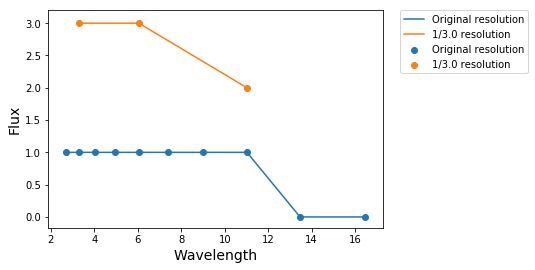

In [24]:
wvl_end = np.exp(np.arange(1., 3., 0.2))
f_end = np.ones(len(wvl_end))
f_end[-2:-1] = 0
f_end[-1] = 0
ns_end = binspec(wvl_end, f_end, f_end, 3.0)
print("No. of new bins should be:", int(float(len(wvl_end)) / 3.0),  ";  No. of new bins are:", ns_end[0].shape)
plt.plot(wvl_end, f_end, label="Original resolution")
plt.scatter(wvl_end, f_end, label="Original resolution")
plt.plot(ns_end[0], ns_end[1], label="1/3.0 resolution")
plt.scatter(ns_end[0], ns_end[1], label="1/3.0 resolution")
plt.xlabel('Wavelength', fontsize=14)
plt.ylabel('Flux', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [25]:
wvl = np.exp(np.arange(1., 3., 0.2))
flux = np.ones(len(wvl))
def testbin(wvl, flux, bin_factor, right_edge_drop_len, left_edge_drop_len):
    flux_edge = flux
    flux_edge[0:left_edge_drop_len] = 0
    flux_edge[-right_edge_drop_len:-1] = 0
    flux_edge[-1] = 0
    new_spectrum = binspec(wvl, flux_edge, flux, bin_factor)
    print("No. of new bins should be:", int(float(len(wvl)) / bin_factor),  ";  No. of new bins are:", new_spectrum[0].shape)
    plt.plot(wvl, flux, label="Original resolution")
    plt.scatter(wvl, flux, label="Original resolution")
    plt.plot(new_spectrum[0], new_spectrum[1], label="Binning factor: bin_factor")
    plt.scatter(new_spectrum[0], new_spectrum[1], label="Binning factor: bin_factor")
    plt.xlabel('Wavelength', fontsize=14)
    plt.ylabel('Flux', fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    return #plot_right#, plot_left

No. of new bins should be: 3 ;  No. of new bins are: (3,)


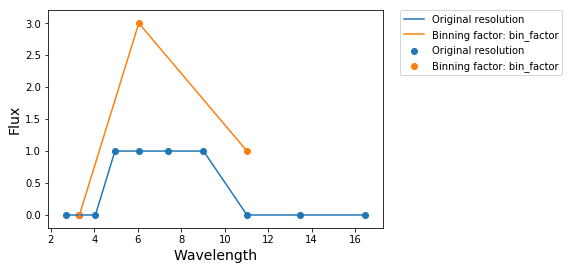

In [26]:
testbin(wvl, flux, 3.0, 3, 3)